In [2]:
import numpy as np
import matplotlib.pyplot as plt
import xs
import time
import pandas as pd
from scipy.optimize import curve_fit
from constants import *

In [15]:
def fitting_function(Te,a0,a1,a2):
    xs = 0
    a_list = np.array([a0,a1,a2])
    for i,a in enumerate(a_list):
        xs += a*np.log(Te)**i
    return np.exp(xs)

def xs_test(Te):
    xs = 0
    for i,a in enumerate(popt):
        xs += a*np.log(Te)**i
    xs = np.exp(xs)
    return xs

In [24]:
reaction_list = ['reaction13']
#reaction_list = ['reaction6_0','reaction6_1','reaction6_2','reaction6_5','reaction6_6','reaction6_7','reaction6_8','reaction6_9']
#reaction_list = ['reaction3_1','reaction3_2','reaction3_3','reaction3_4','reaction3_5','reaction3_6']
data = pd.read_excel('XS_test.xlsx',header=1)
Te_list = np.linspace(0.1,1000,400)

reaction13


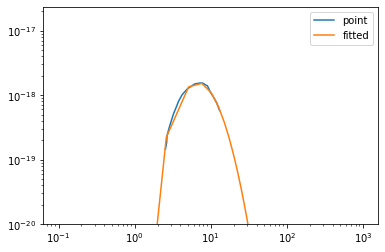

[-48.92557576   8.32912175  -2.18562087] [0.21855483 0.24241545 0.06568696]


In [25]:
result_data = np.array([])
for i in reaction_list:
    print(i)
    Te_data = data[i+'[eV]']
    xs_data = data[i+'[cm2]']
    x = np.array(Te_data)
    x = x[~np.isnan(x)]
    y = np.array(xs_data)
    y = y[~np.isnan(y)]
    curve = curve_fit(fitting_function,x,y)
    popt,pcov = curve
    err = np.sqrt(np.diag(pcov))
    result_data = np.append(result_data,popt)
    plt.plot(x,y)
    plt.plot(Te_list,xs_test(Te_list))
    plt.legend(['point','fitted'])
    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e-20)
    plt.show()
    print(popt, err)

In [42]:
Te_list = np.linspace(0.026,100,200)
def check(Te,reaction_name):
    if 'reaction3_' in reaction_name:
        idx = int(reaction_name[-1])-1
        a_list = reaction3_coefficient[idx]
        xs = 0
        for i,a in enumerate(a_list):
            xs += a*np.log(Te)**i
        return np.exp(xs)*1e-4

In [24]:
xs_coefficient = np.array([-4.88352502e+01,  8.16822153e+00, -2.09388669e+00, -1.68482385e-02,
       -6.08781268e+01,  1.45437955e+01, -3.16752714e+00,  2.23785421e-01,
       -6.24376899e+01,  1.53689265e+01, -3.38305482e+00,  2.42307014e-01,
       -6.22651763e+01,  1.51235068e+01, -3.31356791e+00,  2.35910055e-01,
       -6.17798128e+01,  1.47114812e+01, -3.21071852e+00,  2.27478732e-01,
       -6.24611670e+01,  1.51252163e+01, -3.31378496e+00,  2.36080398e-01,
       -6.29468899e+01,  1.53969768e+01, -3.37378485e+00,  2.40547579e-01,
       -6.06535865e+01,  1.34762175e+01, -2.87508907e+00,  1.97807252e-01,
       -6.10397149e+01,  1.37275074e+01, -2.95992360e+00,  2.06407014e-01,
       -3.96411903e+01,  3.07335765e+00, -1.79451440e+00,  2.10455636e-01,
       -4.54668033e+01,  7.65036410e+00, -3.88771341e+00,  4.99480229e-01,
       -4.73606733e+01,  7.45280495e+00, -3.80957584e+00,  4.89819803e-01,
       -5.49672992e+01,  1.57156397e+01, -7.15744055e+00,  8.99093508e-01,
       -6.00146644e+01,  2.04587514e+01, -8.89365249e+00,  1.09538560e+00,
       -6.39911374e+01,  2.37528096e+01, -9.96974533e+00,  1.20625493e+00])